In [1]:
import gensim
import spacy
import pandas as pd
import smart_open
import random
import sqlite3
import logging
nlp = spacy.load('en', parser=False)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/usr/local/Cellar/python/3.7.0/Frame

In [8]:
import os

# Folder containing all NIPS papers.
data_dir = './TXTS'

# Read all texts into a list.
titles = []
docs = []
files = os.listdir(data_dir)
for filen in files:
    if not filen.startswith('.'):
        with open(data_dir + '/' + filen, errors='ignore') as fid:
            txt = fid.read().replace('\n', '').replace('\t', '').replace('\ ', '')
        docs.append(nlp(txt))
        titles.append(filen)

In [9]:
docs

[  Burlington Primitive: Non-European Art in the Burlington Magazine before 1930Author(s): Colin RhodesSource: The Burlington Magazine, Vol. 146, No. 1211 (Feb., 2004), pp. 98-104Published by: Burlington Magazine Publications Ltd.Stable URL: https://www.jstor.org/stable/20073399Accessed: 15-08-2018 19:11 UTC JSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a widerange of content in a trusted digital archive. We use information technology and tools to increase productivity andfacilitate new forms of scholarship. For more information about JSTOR, please contact support@jstor.org. Your use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available athttps://about.jstor.org/terms
  BurUngton primitive: non-European art in The BurUngton Magazine before 1930 by COLIN RHODES, Loughborough University by COLIN RHODES, Loughborough University HIDDEN IN THE ADVERTISING pages of the first issue of THE HID

In [10]:
docs[1]

  Correction: Charles of Lorraine's Audience Chamber in BrusselsSource: The Burlington Magazine, Vol. 147, No. 1229 (Aug., 2005), p. 586Published by: Burlington Magazine Publications Ltd.Stable URL: https://www.jstor.org/stable/20074110Accessed: 15-08-2018 19:11 UTC JSTOR is a not-for-profit service that helps scholars, researchers, and students discover, use, and build upon a widerange of content in a trusted digital archive. We use information technology and tools to increase productivity andfacilitate new forms of scholarship. For more information about JSTOR, please contact support@jstor.org. Your use of the JSTOR archive indicates your acceptance of the Terms & Conditions of Use, available athttps://about.jstor.org/terms
 CALENDAR Los Angeles, J. Paul Getty Museum. For Your Approval: Oil Sketches by Tiepolo, part of an ongoing Approval: Oil Sketches by Tiepolo, part of an ongoing rotation of loans from the Courtauld Institute, Lon rotation of loans from the Courtauld Institute, Lo

In [12]:
article_sents_length= [len(sent) for sent in docs[1]]
[sent for sent in docs[1] if len(sent) == max(article_sents_length)]

[https://www.jstor.org/stable/20074110Accessed]

In [42]:
def locations(query_word, documents): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in documents 
         if word.text.lower() == query_word], bins=100)[0])

In [43]:
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12f1cd9b0>,
      dtype=object)

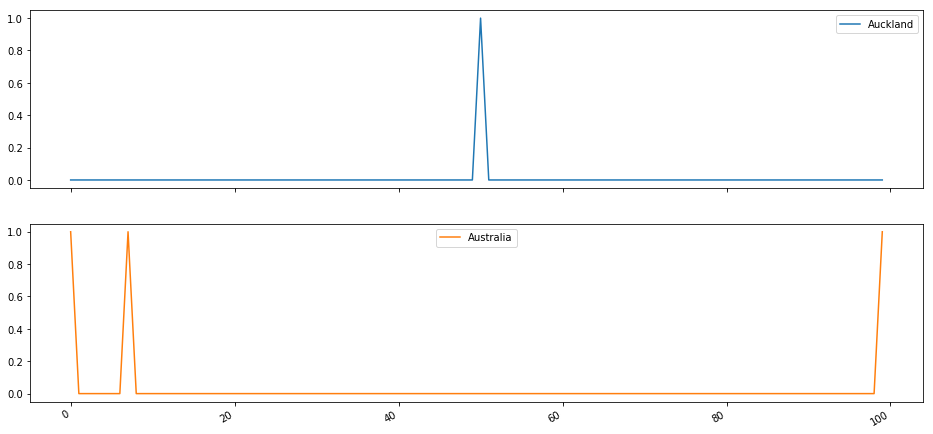

In [44]:
# I have no idea why I have to keep running this. 
rcParams['figure.figsize'] = 16, 8

df = pd.DataFrame(
    {name: locations(name.lower(), docs[1]) 
     for name in ['Auckland', 'Australia']}
)
df.plot(subplots=True)

In [29]:
df

,Auckland,Australia
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [45]:
[ent for ent in docs[1].ents if ent.label_ == 'PERSON']

[Lorraine,
 Your Approval: Oil Sketches,
 Tiepolo,
 Tiepolo,
 Getty,
 Rembrandt,
 Paul Strand,
 Isaac Julien,
 Isaac Julien,
 Blake Byrne,
 Jean-Michel Basquiat,
 Octo,
 Paul Chan,
 Stephen Shore,
 Patty Chang,
 Fiona Tan,
 Berthe Morisot,
 Crafts,
 Chuck Close,
 Jack Lenor Larsen,
 Collector,
 Larsen,
 Whisder,
 Cen,
 Worlds,
 Francis Wheatley,
 Edward Lamson Henry's,
 Paintings,
 Neo Rauch,
 Michelangelo,
 Tacita Dean,
 Daniel Richter,
 Ho Suh,
 John Walker,
 McGlothlin,
 Rio de Janeiro,
 Henry Moore,
 Brasilia,
 Maxfield Par,
 John,
 NH,
 Irving Penn,
 Williamstown,
 Jacques-Louis David,
 Grace Cossington Smith,
 Fiona Hall,
 William Hodges 1744-1797,
 Perth,
 William Kentridge,
 Margaret Preston,
 Wolfgang Laib,
 Kudug Ataman,
 Roslyn Oxley,
 Tracey,
 Van Gogh,
 Otterlo,
 Bernard Buffet,
 Dal,
 Fig,
 ofScipio,
 David Roentgen,
 Januarius Zick,
 Reinier Baarsen's,
 Charles,
 Lorraine]

In [59]:
def adjectivesDescribingCharacters(text, character):
    sents = [sent for sent in docs[1].sents if character in sent.string]
    adjectives = []
    for sent in sents: 
        for word in sent: 
            if character in word.string:
                for child in word.children: 
                    if child.pos_ == 'ADJ': 
                        adjectives.append(child.string.strip())
    return Counter(adjectives).most_common(30)

In [61]:
adjectivesDescribingCharacters(docs[1], 'Isaac Julien')

[]

In [66]:
people = Counter([w.string.strip() for w in docs[1].ents if w.label_ == 'PERSON']).most_common(10)

In [67]:
people

[('Lorraine', 2),
 ('Tiepolo', 2),
 ('Isaac Julien', 2),
 ('Your Approval: Oil Sketches', 1),
 ('Getty', 1),
 ('Rembrandt', 1),
 ('Paul Strand', 1),
 ('Blake Byrne', 1),
 ('Jean-Michel Basquiat', 1),
 ('Octo', 1)]

In [68]:
people_df = pd.DataFrame([{'name': pep[0], 'count': pep[1]} for pep in people])
people_df.to_csv('people.csv')
people_df

,count,name
0,2,Lorraine
1,2,Tiepolo
2,2,Isaac Julien
3,1,Your Approval: Oil Sketches
4,1,Getty
5,1,Rembrandt
6,1,Paul Strand
7,1,Blake Byrne
8,1,Jean-Michel Basquiat
9,1,Octo


In [73]:
places = Counter([w.string for w in docs[1].ents if w.label_ == "GPE"]).most_common(30)
places

[('Los Angeles', 5),
 ('Washington', 4),
 ('Sydney', 4),
 ('Louisville', 3),
 ('Los Angeles ', 2),
 ('San Francisco', 2),
 ('New Haven', 2),
 ('Russia', 2),
 ('Philadelphia', 2),
 ('Japan ', 2),
 ('Tokyo', 2),
 ('Brooklyn', 1),
 ('Houston}. Los Angeles', 1),
 ('Marmottan ', 1),
 ('Milwaukee', 1),
 ('Minneapolis', 1),
 ('Atlanta ', 1),
 ('Buffalo', 1),
 ('Montreal', 1),
 ('North Adams', 1),
 ('MASS ', 1),
 ('Omaha', 1),
 ('Petersburg', 1),
 ('Leonardo', 1),
 ('Florence ', 1),
 ('C?zanne', 1),
 ('Phoenix', 1),
 ('America ', 1),
 ('Richmond', 1),
 ('Texas', 1)]

In [74]:
places_df = pd.DataFrame([{'name': place[0], 'count': place[1]} for place in places])
places_df.to_csv('places.csv')
places_df

,count,name
0,5,Los Angeles
1,4,Washington
2,4,Sydney
3,3,Louisville
4,2,Los Angeles
5,2,San Francisco
6,2,New Haven
7,2,Russia
8,2,Philadelphia
9,2,Japan
